In [48]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy
print('numpy: {}'.format(numpy.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))
import sklearn
import pandas as pd

Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
scipy: 1.10.1
numpy: 1.22.4
matplotlib: 3.7.1
pandas: 1.5.3


In [49]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC
from IPython.display import display
%matplotlib inline
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from IPython.display import display
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score



In [50]:
data = pd.read_csv('final_dataset.csv')
display(data.head())

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,0,2000-08-19,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,1,2000-08-19,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-4.0
2,2,2000-08-19,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0
3,3,2000-08-19,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0
4,4,2000-08-19,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-10.0


In [51]:
# Filter the DataFrame to only include rows where "MW" is greater than 3
data = data.loc[data['MW'] > 3]

# Drop the specified columns from the DataFrame
columns_to_drop = ['Unnamed: 0', 'HomeTeam', 'AwayTeam', 'Date', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG',
                   'FTAG', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HomeTeamLP', 'AwayTeamLP', 'DiffPts', 'HTFormPts',
                   'ATFormPts', 'HM4', 'HM5', 'AM4', 'AM5', 'HTLossStreak5', 'ATLossStreak5', 'HTWinStreak5',
                   'ATWinStreak5', 'HTWinStreak3', 'HTLossStreak3', 'ATWinStreak3', 'ATLossStreak3']
data.drop(columns=columns_to_drop, inplace=True)

<ipython-input-51-374a99d19229>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=columns_to_drop, inplace=True)


In [52]:

data['FTR'] = data['FTR'].replace({'H': 1, 'NH': 0})
data.head(10)



<ipython-input-52-b4c56a03e62e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FTR'] = data['FTR'].replace({'H': 1, 'NH': 0})


,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,HTGD,ATGD,DiffFormPts,DiffLP
30,1,1.25,1.00,D,D,W,D,W,L,0.50,0.25,0.25,-16.0
31,0,0.75,0.25,L,L,W,D,L,L,-0.50,-0.75,0.50,-2.0
32,1,1.00,1.00,L,D,W,D,W,L,0.00,0.25,0.00,-3.0
33,0,0.75,0.50,L,L,W,D,L,D,-0.25,-0.25,0.25,3.0
34,0,1.00,1.50,D,L,W,W,W,L,0.00,0.75,-0.50,3.0
35,0,1.50,1.50,W,W,L,W,W,L,0.00,0.25,0.00,3.0
36,0,0.50,1.00,D,L,D,L,D,W,-0.25,0.25,-0.50,4.0
37,1,1.25,1.00,D,W,D,W,D,L,0.25,-0.25,0.25,-10.0
38,1,1.00,0.50,D,L,W,L,D,D,-0.25,-0.50,0.50,-2.0
39,0,1.00,1.50,D,W,L,W,W,L,0.25,0.75,-0.50,15.0


In [53]:
print(data.describe())

               FTR          HTP          ATP         HTGD         ATGD  \
count  7350.000000  7350.000000  7350.000000  7350.000000  7350.000000   
mean      0.462041     1.279539     1.288473    -0.005029     0.008833   
std       0.498591     0.494253     0.493227     0.727729     0.726426   
min       0.000000     0.000000     0.000000    -2.250000    -2.285714   
25%       0.000000     0.931609     0.944444    -0.500000    -0.500000   
50%       0.000000     1.222222     1.230769    -0.111111    -0.096774   
75%       1.000000     1.600000     1.600000     0.444444     0.470588   
max       1.000000     2.821429     2.821429     2.777778     2.800000   

       DiffFormPts       DiffLP  
count  7350.000000  7350.000000  
mean     -0.009287    -0.014286  
std       0.373369     8.401669  
min      -2.250000   -19.000000  
25%      -0.178571    -6.000000  
50%       0.000000     0.000000  
75%       0.156250     6.000000  
max       2.250000    19.000000  


In [54]:
# Total number of matches
n_matches = data.shape[0]

# Number of features
n_features = data.shape[1] - 1

# Number of matches won by the home team
n_homewins = data[data['FTR'] == 1].shape[0]

# Win rate for the home team
win_rate = (n_homewins / n_matches) * 100

# Print the results
print("Total number of matches: {}".format(n_matches))
print("Number of features: {}".format(n_features))
print("Number of matches won by home team: {}".format(n_homewins))
print("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 7350
Number of features: 12
Number of matches won by home team: 3396
Win rate of home team: 46.20%


<Figure size 1000x1000 with 0 Axes>

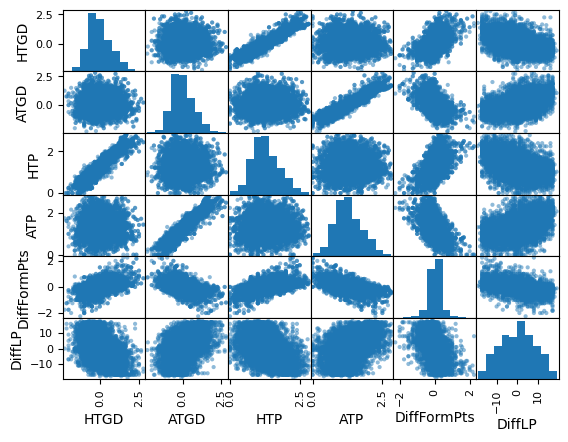

In [55]:
# Visualising distribution of data
columns_to_visualize = ['HTGD', 'ATGD', 'HTP', 'ATP', 'DiffFormPts', 'DiffLP']
scatter_data = data[columns_to_visualize]

plt.figure(figsize=(10, 10))
scatter_matrix(scatter_data)
plt.show()

In [56]:
# Splitting the data into input features and target variable
X_all = data.drop('FTR', axis=1)
y_all = data['FTR']

# Standardizing the selected columns
cols = ['HTGD', 'ATGD', 'HTP', 'ATP', 'DiffLP']
scaler = StandardScaler()
X_all[cols] = scaler.fit_transform(X_all[cols])

In [57]:


# Remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = X.copy()
    
    # One-hot encode categorical variables
    categorical_cols = output.select_dtypes(include='object').columns
    output = pd.get_dummies(output, columns=categorical_cols)
    
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))


Processed feature columns (24 total features):
['HTP', 'ATP', 'HTGD', 'ATGD', 'DiffFormPts', 'DiffLP', 'HM1_D', 'HM1_L', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_W']


In [58]:
#  printing the first five rows
print ("\nFeature values:")
display(X_all.head())



Feature values:


,HTP,ATP,HTGD,ATGD,DiffFormPts,DiffLP,HM1_D,HM1_L,HM1_W,HM2_D,...,HM3_W,AM1_D,AM1_L,AM1_W,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W
30,-0.059769,-0.584908,0.694027,0.332014,0.25,-1.902813,1,0,0,1,...,1,1,0,0,0,0,1,0,1,0
31,-1.071466,-2.105611,-0.680204,-1.044682,0.50,-0.236364,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0
32,-0.565617,-0.584908,0.006911,0.332014,0.00,-0.355396,0,1,0,1,...,1,1,0,0,0,0,1,0,1,0
33,-1.071466,-1.598710,-0.336646,-0.356334,0.25,0.358797,0,1,0,0,...,1,1,0,0,0,1,0,1,0,0
34,-0.565617,0.428894,0.006911,1.020362,-0.50,0.358797,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [59]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)

In [60]:
import timeit

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    
    start_time = timeit.default_timer()
    clf.fit(X_train, y_train)
    end_time = timeit.default_timer()
    elapsed_time = end_time - start_time
    
    
    print("Trained model in {:.4f} seconds".format(elapsed_time))

def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    
    start = timeit()
    y_pred = clf.predict(features)
    
    end = timeit()
    
    print("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, pos_label=1), sum(target == y_pred) / float(len(y_pred))


def predict_labels(clf, features, target):
  
  
    start_time = timeit.default_timer()
    y_pred = clf.predict(features)
    end_time = timeit.default_timer()
    elapsed_time = end_time - start_time
    
    
    f1 = f1_score(target, y_pred, pos_label=1)
    accuracy = sum(target == y_pred) / float(len(y_pred))
    
    
    print("Made predictions in {:.4f} seconds.".format(elapsed_time))
    return f1, accuracy
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

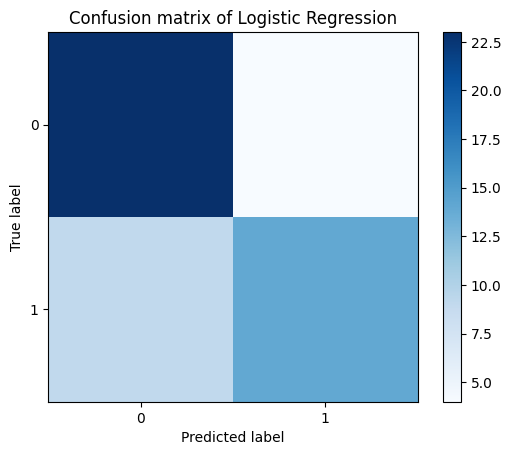

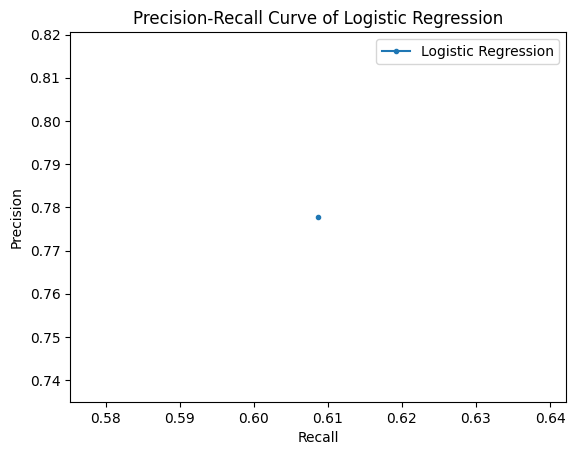

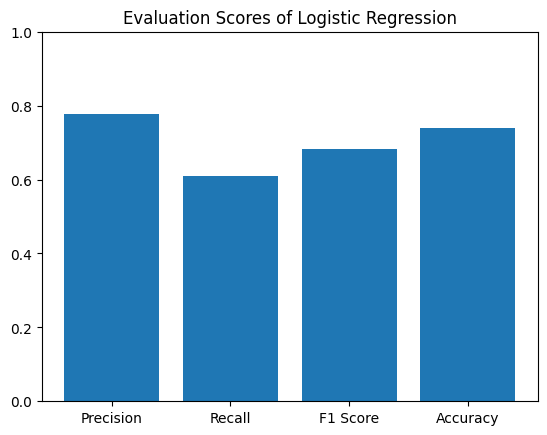

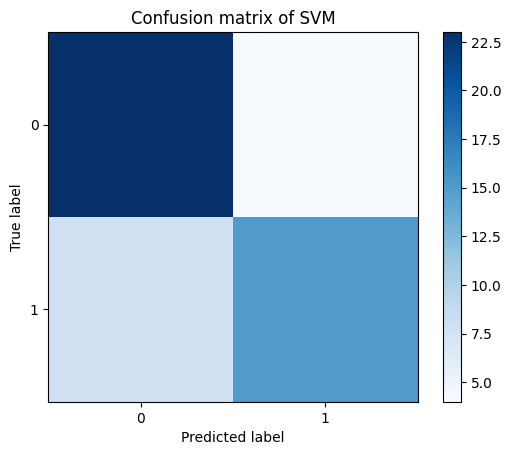

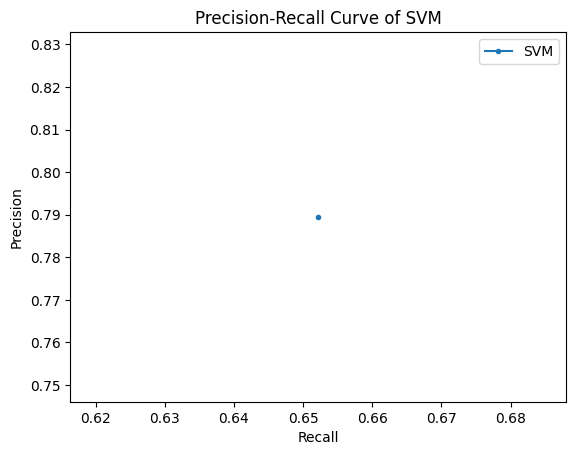

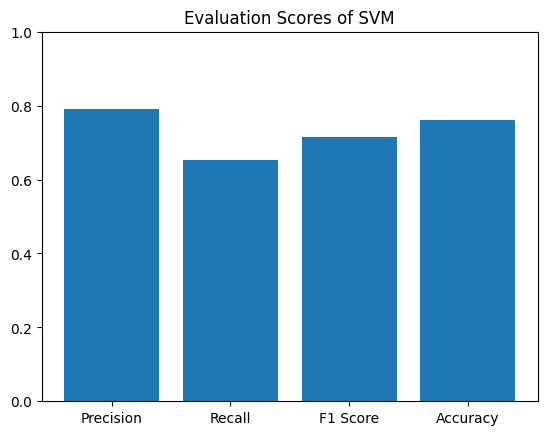

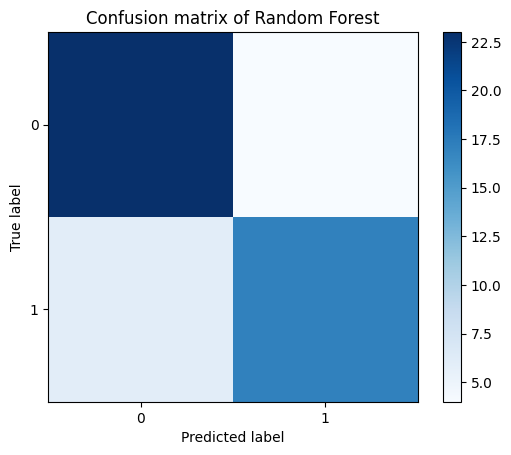

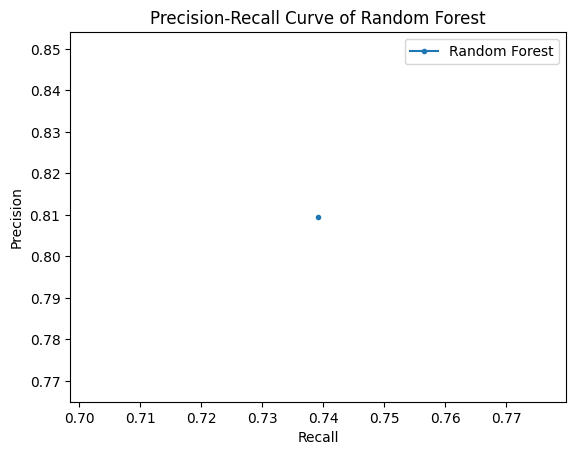

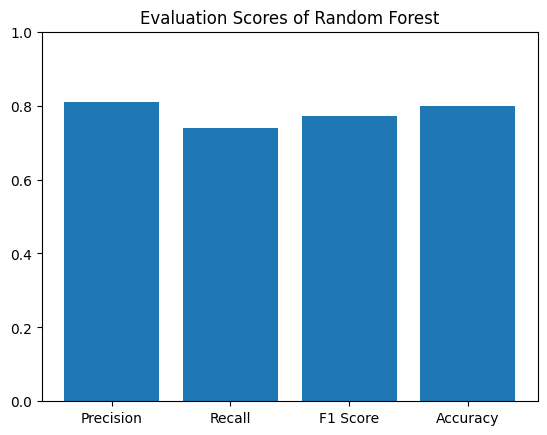

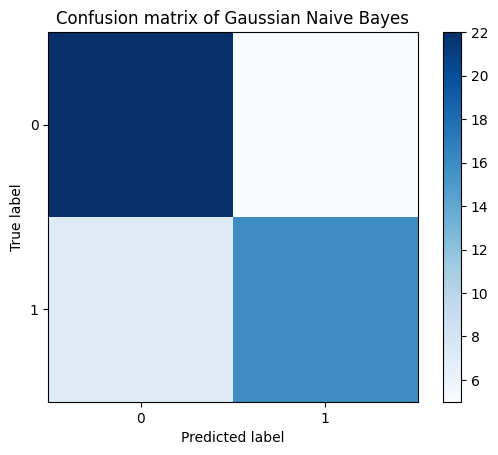

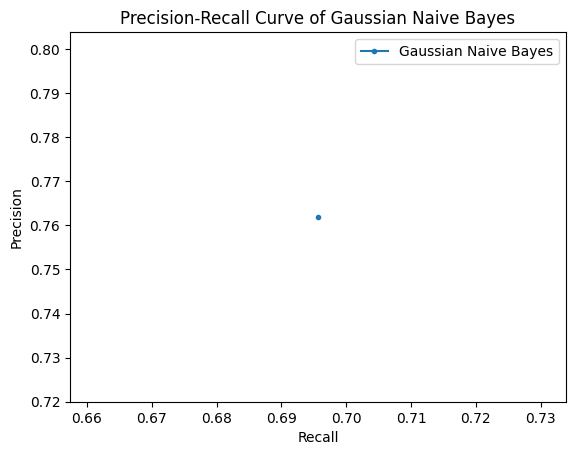

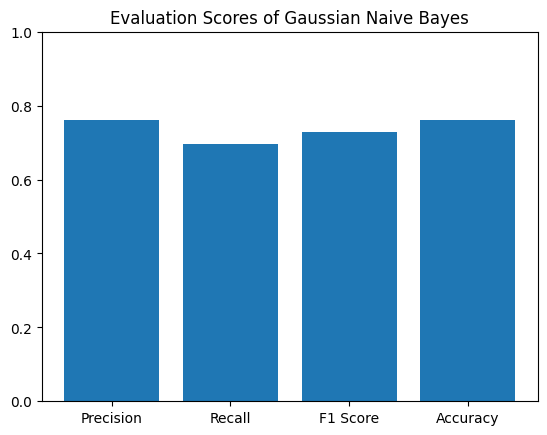

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


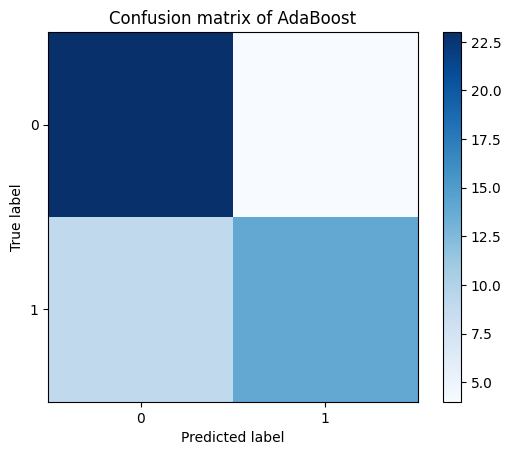

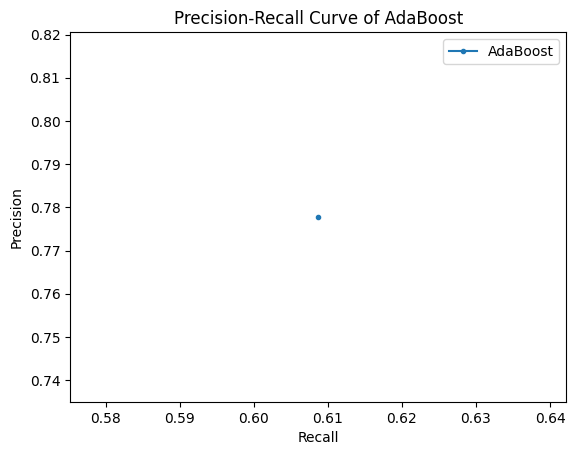

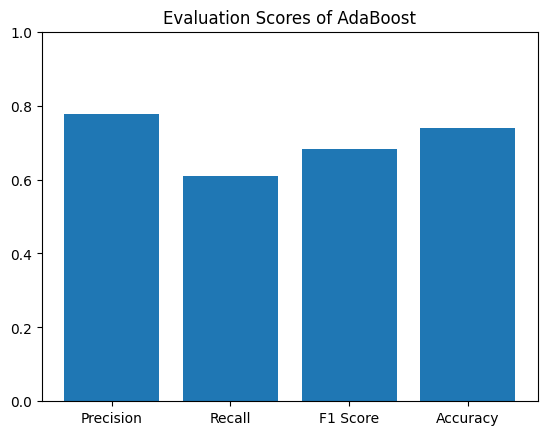

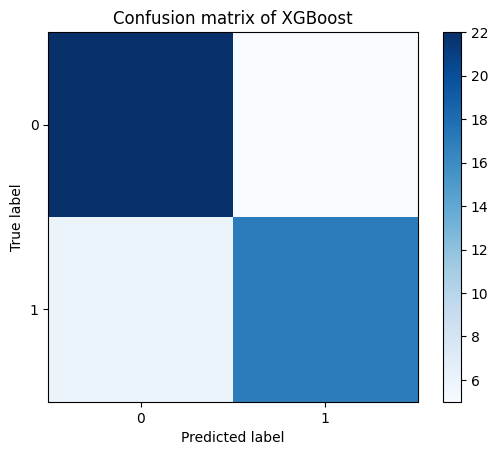

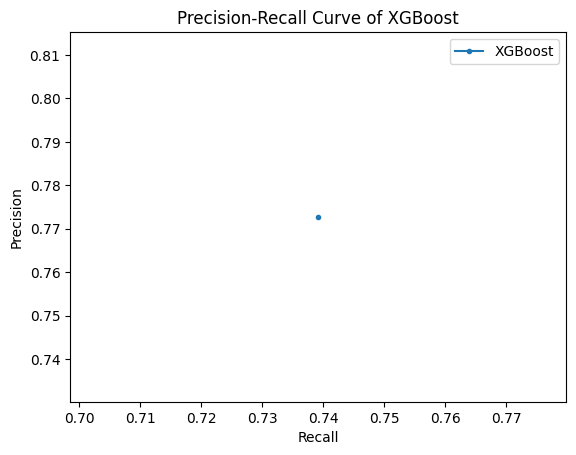

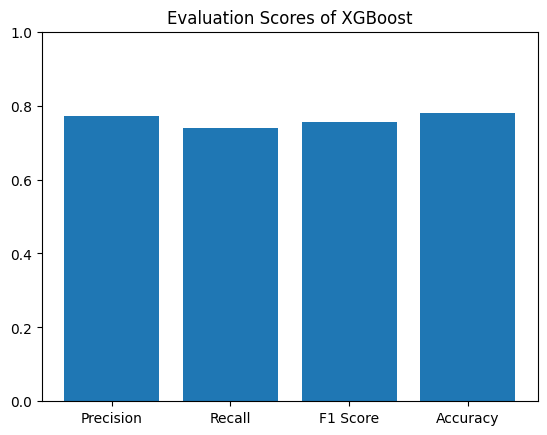

Evaluation scores for Logistic Regression:
Precision: 0.78
Recall: 0.61
F1 Score: 0.68
Accuracy: 0.74


Evaluation scores for SVM:
Precision: 0.79
Recall: 0.65
F1 Score: 0.71
Accuracy: 0.76


Evaluation scores for Random Forest:
Precision: 0.81
Recall: 0.74
F1 Score: 0.77
Accuracy: 0.80


Evaluation scores for Gaussian Naive Bayes:
Precision: 0.76
Recall: 0.70
F1 Score: 0.73
Accuracy: 0.76


Evaluation scores for AdaBoost:
Precision: 0.78
Recall: 0.61
F1 Score: 0.68
Accuracy: 0.74


Evaluation scores for XGBoost:
Precision: 0.77
Recall: 0.74
F1 Score: 0.76
Accuracy: 0.78




In [61]:


# Define the classifiers
clf_A = LogisticRegression(random_state=42)
clf_B = SVC(random_state=912, kernel='rbf')
clf_C = RandomForestClassifier(n_estimators=100, random_state=42)
clf_D = GaussianNB()
base_estimator = DecisionTreeClassifier(max_depth=1)
clf_E = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100)
clf_F = xgb.XGBClassifier(seed=82)

# Create a list of classifiers and their names
classifiers = [('Logistic Regression', clf_A), ('SVM', clf_B), ('Random Forest', clf_C), ('Gaussian Naive Bayes', clf_D), ('AdaBoost', clf_E), ('XGBoost', clf_F)]

# Create empty lists to store the evaluation scores
precisions = []
recalls = []
f1_scores = []
accuracies = []

# Evaluate each classifier and calculate the evaluation scores
for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    accuracies.append(accuracy)
    
    # Plot the confusion matrix
    fig, ax = plt.subplots()
    im = ax.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(confusion.shape[1]),
           yticks=np.arange(confusion.shape[0]),
           xlabel='Predicted label',
           ylabel='True label',
           title=f'Confusion matrix of {name}')
    plt.show()
    
    # Plot the precision-recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, marker='.', label=name)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'Precision-Recall Curve of {name}')
    ax.legend()
    plt.show()
    
    # Plot the bar graph of precision, recall, F1 score, and accuracy
    fig, ax = plt.subplots()
    ax.bar(['Precision', 'Recall', 'F1 Score', 'Accuracy'], [precision, recall, f1, accuracy])
    ax.set_ylim(0, 1)
    ax.set_title(f'Evaluation Scores of {name}')
    plt.show()

# Print the evaluation scores for each classifier
for i, (name, _) in enumerate(classifiers):
    print(f'Evaluation scores for {name}:')
    print(f'Precision: {precisions[i]:.2f}')
    print(f'Recall: {recalls[i]:.2f}')
    print(f'F1 Score: {f1_scores[i]:.2f}')
    print(f'Accuracy: {accuracies[i]:.2f}')
    print('\n')


In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

# Create the parameter distributions to sample from
param_dist = {'learning_rate': [0.01, 0.05, 0.1, 0.2],
              'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
              'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
              'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
              'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
              'reg_alpha': [0.0, 0.01, 0.05, 0.1, 0.25, 0.5, 1.0],
              'n_estimators': [100, 250, 500, 750, 1000]}

# Initialize the classifier
clf = xgb.XGBClassifier(seed=2)

# Create the scoring function
f1_scorer = make_scorer(f1_score, pos_label=1)

# Perform the randomized search with 100 iterations
rand_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100,
                                 scoring=f1_scorer, cv=5, random_state=2)

# Fit the randomized search object to the training data
rand_search.fit(X_train, y_train)

# Get the estimator with the best hyperparameters
best_clf = rand_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:", rand_search.best_params_)

# Evaluate the model on the training and test data
train_f1, train_acc = predict_labels(best_clf, X_train, y_train)
test_f1, test_acc = predict_labels(best_clf, X_test, y_test)

# Print the evaluation metrics
print("Training set F1 score and accuracy:", train_f1, train_acc)
print("Test set F1 score and accuracy:", test_f1, test_acc)


Best hyperparameters: {'subsample': 0.8, 'reg_alpha': 0.0, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}
Made predictions in 0.1869 seconds.
Made predictions in 0.0060 seconds.
Training set F1 score and accuracy: 1.0 1.0
Test set F1 score and accuracy: 0.8636363636363636 0.88


In [62]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

if y_pred[0] == 1:
    print('The home team is predicted to win.')
else:
    print('The away team is predicted to win.')

print(y_pred)

The away team is predicted to win.
[0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1
 0 0 1 0 1 0 0 0 0 1 1 0 1]


In [68]:
clf =  xgb.XGBClassifier(seed=2)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

if y_pred[0] == 1:
    print('The home team is predicted to win.')
else:
    print('The away team is predicted to win.')

print(y_pred)

The home team is predicted to win.
[1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1
 1 0 1 0 1 1 0 1 0 1 1 0 1]
